Ë´ãËº∏ÂÖ•Ë®ìÁ∑¥Ë≥áÊñôÊï∏ÈáèÔºà‰æãÂ¶Ç 1000ÔºâÔºö500
Epoch 1/20 | G_loss: 0.6201 | D_loss: 0.8262
Epoch 2/20 | G_loss: 0.5477 | D_loss: 0.9140
Epoch 3/20 | G_loss: 0.5590 | D_loss: 0.9257
Epoch 4/20 | G_loss: 0.6853 | D_loss: 0.8356
Epoch 5/20 | G_loss: 0.7975 | D_loss: 0.9045
Epoch 6/20 | G_loss: 0.4990 | D_loss: 1.1916
Epoch 7/20 | G_loss: 0.4647 | D_loss: 1.3798
Epoch 8/20 | G_loss: 0.5735 | D_loss: 1.1934
Epoch 9/20 | G_loss: 0.7441 | D_loss: 0.9554
Epoch 10/20 | G_loss: 0.8277 | D_loss: 0.8566
Epoch 11/20 | G_loss: 0.7642 | D_loss: 0.9139
Epoch 12/20 | G_loss: 0.6312 | D_loss: 1.1136
Epoch 13/20 | G_loss: 0.5896 | D_loss: 1.2039
Epoch 14/20 | G_loss: 0.6665 | D_loss: 1.0743
Epoch 15/20 | G_loss: 0.8356 | D_loss: 0.8875
Epoch 16/20 | G_loss: 0.9847 | D_loss: 0.8062
Epoch 17/20 | G_loss: 1.1744 | D_loss: 0.6804
Epoch 18/20 | G_loss: 1.2548 | D_loss: 0.6431
Epoch 19/20 | G_loss: 1.3582 | D_loss: 0.6084
Epoch 20/20 | G_loss: 1.3413 | D_loss: 0.6588


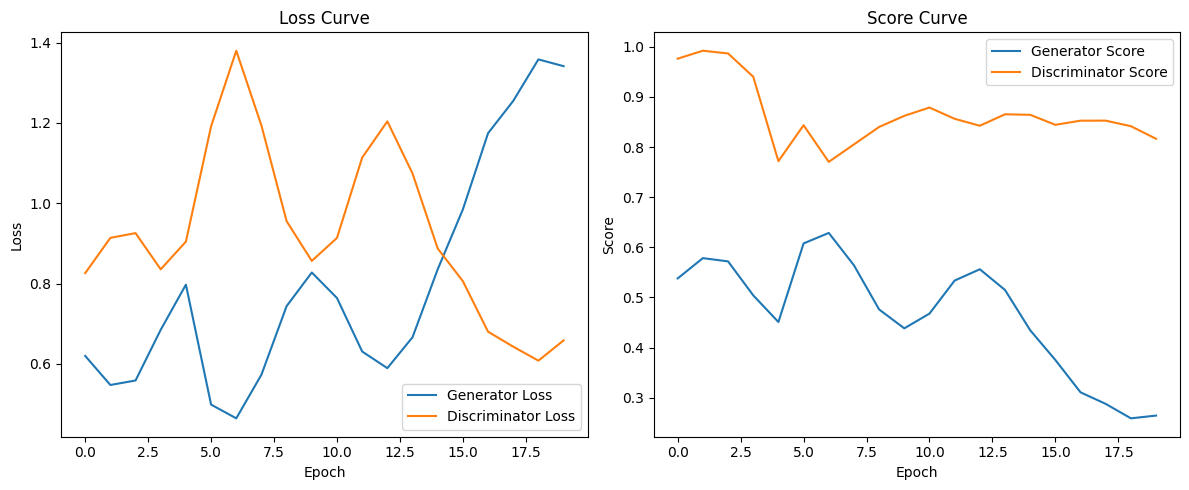

In [ ]:
# ÂÆâË£ùÂøÖË¶ÅÂ•ó‰ª∂ÔºàÂ¶ÇÊûúÂ∞öÊú™ÂÆâË£ùÔºâ
!pip install torch torchvision matplotlib

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np

# ?? ‰ΩøÁî®ËÄÖËº∏ÂÖ•ÔºöË®ìÁ∑¥Ë≥áÊñôÊï∏Èáè
training_data_size = int(input("Ë´ãËº∏ÂÖ•Ë®ìÁ∑¥Ë≥áÊñôÊï∏ÈáèÔºà‰æãÂ¶Ç 1000ÔºâÔºö"))

# ?? Ë≥áÊñôËºâÂÖ•ËàáÈ†êËôïÁêÜ
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
subset_indices = list(range(training_data_size))
train_loader = DataLoader(Subset(full_dataset, subset_indices), batch_size=64, shuffle=True)

# ?? Âª∫Á´ã Generator Ëàá Discriminator Ê®°Âûã
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Tanh()
        )
    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# ?? ÂàùÂßãÂåñÊ®°ÂûãËàáÂÑ™ÂåñÂô®
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator().to(device)
D = Discriminator().to(device)
loss_fn = nn.BCELoss()
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)

# ?? ÂÑ≤Â≠ò loss Ëàá score
g_losses, d_losses = [], []
g_scores, d_scores = [], []

# ?? Ë®ìÁ∑¥Ëø¥Âúà
epochs = 20
for epoch in range(epochs):
    for real_imgs, _ in train_loader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Ë®ìÁ∑¥ Discriminator
        z = torch.randn(batch_size, 100).to(device)
        fake_imgs = G(z)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        d_real_loss = loss_fn(D(real_imgs), real_labels)
        d_fake_loss = loss_fn(D(fake_imgs.detach()), fake_labels)
        d_loss = d_real_loss + d_fake_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Ë®ìÁ∑¥ Generator
        g_loss = loss_fn(D(fake_imgs), real_labels)
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

    # ÂÑ≤Â≠òÊØèÂÄã epoch ÁöÑ loss Ëàá score
    g_losses.append(g_loss.item())
    d_losses.append(d_loss.item())
    g_scores.append(D(fake_imgs).mean().item())
    d_scores.append(D(real_imgs).mean().item())

    print(f"Epoch {epoch+1}/{epochs} | G_loss: {g_loss.item():.4f} | D_loss: {d_loss.item():.4f}")

# ?? Áπ™Ë£Ω Loss Ëàá Score Êõ≤Á∑ö
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(g_losses, label='Generator Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(g_scores, label='Generator Score')
plt.plot(d_scores, label='Discriminator Score')
plt.title('Score Curve')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

Device: cuda
[Epoch 01/20] G_loss: 0.8184 | D_loss: 1.0863 | G_score‚âà0.436 | D_score‚âà0.620 | sigma=0.100
[Epoch 02/20] G_loss: 0.9706 | D_loss: 1.0221 | G_score‚âà0.362 | D_score‚âà0.624 | sigma=0.095
[Epoch 03/20] G_loss: 1.0457 | D_loss: 0.9947 | G_score‚âà0.332 | D_score‚âà0.630 | sigma=0.089
[Epoch 04/20] G_loss: 1.0266 | D_loss: 1.0286 | G_score‚âà0.339 | D_score‚âà0.617 | sigma=0.084
[Epoch 05/20] G_loss: 1.0028 | D_loss: 1.0652 | G_score‚âà0.349 | D_score‚âà0.603 | sigma=0.079
[Epoch 06/20] G_loss: 0.9915 | D_loss: 1.0869 | G_score‚âà0.354 | D_score‚âà0.596 | sigma=0.074
[Epoch 07/20] G_loss: 0.9889 | D_loss: 1.0934 | G_score‚âà0.356 | D_score‚âà0.594 | sigma=0.068
[Epoch 08/20] G_loss: 0.9722 | D_loss: 1.1171 | G_score‚âà0.363 | D_score‚âà0.586 | sigma=0.063
[Epoch 09/20] G_loss: 0.9552 | D_loss: 1.1363 | G_score‚âà0.370 | D_score‚âà0.579 | sigma=0.058
[Epoch 10/20] G_loss: 0.9504 | D_loss: 1.1433 | G_score‚âà0.372 | D_score‚âà0.576 | sigma=0.053
[Epoch 11/20] G_loss: 0.951

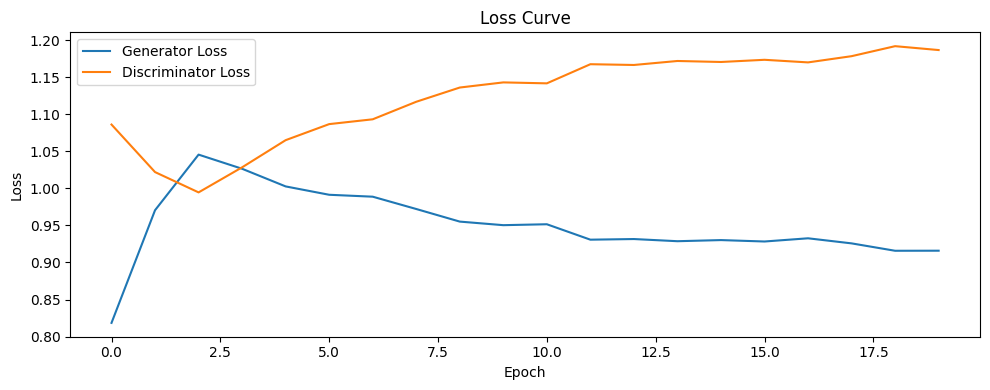

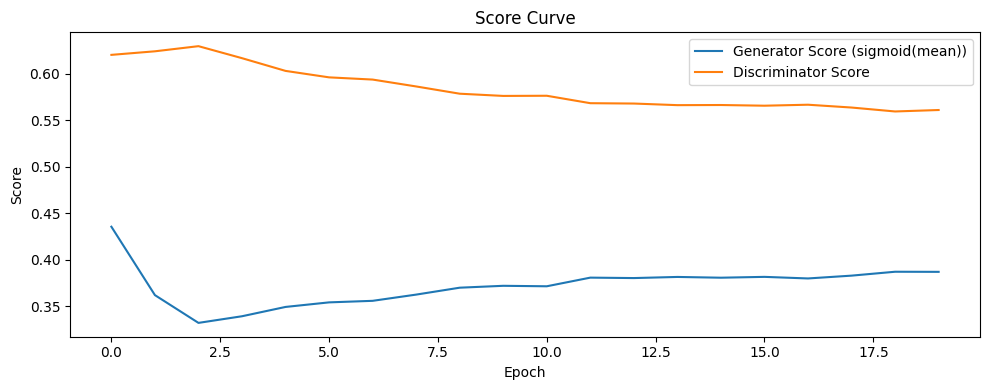

In [ ]:
# ====== GAN on MNISTÔºöÁ©©ÂÆöÁâàÔºàÂèØÁõ¥Êé•Âü∑Ë°åÔºâ ======
# Ëã•Âú® Colab Á¨¨‰∏ÄÊ¨°‰ΩøÁî®ÔºåÂèñÊ∂à‰∏ã‰∏ÄË°åË®ªËß£ÂÆâË£ùÂ•ó‰ª∂
# !pip install -q torch torchvision matplotlib

import os, random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from torch.nn.utils import spectral_norm

# ---------- Ë∂ÖÂèÉÊï∏ ----------
seed = 42
z_dim = 100
batch_size = 64
epochs = 20
g_lr = 2e-4
d_lr = 1e-4                 # ÊîæÊÖ¢ D
betas = (0.5, 0.999)
real_label_smooth = 0.9     # label smoothing
save_dir = "./gan_mnist_out"
os.makedirs(save_dir, exist_ok=True)

# ---------- Âõ∫ÂÆöÈö®Ê©üÁ®ÆÂ≠ê ----------
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# ---------- Ë£ùÁΩÆ ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Ë≥áÊñô ----------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))   # Êò†Â∞ÑÂà∞ [-1, 1]ÔºåÈÖçÂêà Tanh
])
train_set = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)

# ---------- Ê®°Âûã ----------
class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 784),
            nn.Tanh()
        )
    def forward(self, z):
        x = self.model(z)
        return x.view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        # **Ê≥®ÊÑè**Ôºö‰∏çÂä† SigmoidÔºåÈÖç BCEWithLogitsLoss
        self.model = nn.Sequential(
            nn.Flatten(),
            spectral_norm(nn.Linear(784, 256)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            spectral_norm(nn.Linear(256, 1))  # logits
        )
    def forward(self, x):
        return self.model(x)

def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0.0, 0.02)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

G = Generator(z_dim).to(device).apply(weights_init)
D = Discriminator().to(device).apply(weights_init)

criterion = nn.BCEWithLogitsLoss()
g_optimizer = optim.Adam(G.parameters(), lr=g_lr, betas=betas)
d_optimizer = optim.Adam(D.parameters(), lr=d_lr, betas=betas)

# ---------- ËøΩËπ§ ----------
g_losses, d_losses, g_scores, d_scores = [], [], [], []
fixed_z = torch.randn(64, z_dim, device=device)

# Instance NoiseÔºöÁî± 0.10 Á∑©ÈôçÂà∞ 0
sigma_start, sigma_end = 0.10, 0.00
def sigma_at(epoch_idx, total_epochs):
    # epoch_idx Âæû 1 ÈñãÂßã
    return sigma_start + (sigma_end - sigma_start) * (epoch_idx - 1) / (total_epochs - 1)

def add_instance_noise(x, sigma):
    return x + torch.randn_like(x) * sigma if sigma > 0 else x

# ---------- Ë®ìÁ∑¥ ----------
for epoch in range(1, epochs + 1):
    G.train(); D.train()
    sig = sigma_at(epoch, epochs)

    epoch_g_loss = epoch_d_loss = 0.0
    epoch_g_score = epoch_d_score = 0.0
    n_batches = 0

    for real_imgs, _ in train_loader:
        real_imgs = real_imgs.to(device)
        bsz = real_imgs.size(0)
        real_targets = torch.full((bsz, 1), real_label_smooth, device=device)
        fake_targets = torch.zeros(bsz, 1, device=device)

        # ---- Train D ----
        D.zero_grad(set_to_none=True)
        with torch.no_grad():
            z = torch.randn(bsz, z_dim, device=device)
            fake_imgs = G(z)
        d_real_logits = D(add_instance_noise(real_imgs, sig))
        d_fake_logits = D(add_instance_noise(fake_imgs, sig))
        d_loss = criterion(d_real_logits, real_targets) + criterion(d_fake_logits, fake_targets)
        d_loss.backward()
        d_optimizer.step()

        # ‰º∞ÁÆó D Áï∂ÂâçÂº∑Â∫¶
        with torch.no_grad():
            d_real_p = torch.sigmoid(d_real_logits).mean().item()
            d_fake_p = torch.sigmoid(d_fake_logits).mean().item()
            d_score_batch = (d_real_p + (1.0 - d_fake_p)) / 2.0  # Ë∂äÊé•Ëøë 1 Ë°®Á§∫ D Ë∂äÂº∑

        # ---- Train GÔºàËá™ÈÅ©ÊáâÂ§öÊ≠•ÔºöD Â§™Âº∑ÊôÇÂ§öË®ì‰∏ÄÊ≠•Ôºâ----
        g_steps = 2 if d_score_batch > 0.70 else 1
        last_g_logits = None
        for _ in range(g_steps):
            G.zero_grad(set_to_none=True)
            z = torch.randn(bsz, z_dim, device=device)
            gen_imgs = G(z)
            last_g_logits = D(add_instance_noise(gen_imgs, sig))
            g_loss = criterion(last_g_logits, real_targets)
            g_loss.backward()
            g_optimizer.step()

        # --- Á¥ÄÈåÑ ---
        with torch.no_grad():
            g_prob = torch.sigmoid(last_g_logits).mean().item()
        epoch_g_loss += g_loss.item()
        epoch_d_loss += d_loss.item()
        epoch_g_score += g_prob
        epoch_d_score += d_score_batch
        n_batches += 1

    # Âπ≥ÂùáÂåñ
    g_losses.append(epoch_g_loss / n_batches)
    d_losses.append(epoch_d_loss / n_batches)
    g_scores.append(epoch_g_score / n_batches)
    d_scores.append(epoch_d_score / n_batches)

    # Áî¢ÁîüÂõ∫ÂÆöÂô™ËÅ≤ÁöÑÊ®£Êú¨Âø´ÁÖß
    with torch.no_grad():
        samples = G(fixed_z).cpu()
        samples = (samples + 1) / 2  # [-1,1] -> [0,1]
        save_image(samples, os.path.join(save_dir, f"samples_epoch_{epoch:03d}.png"), nrow=8)

    print(f"[Epoch {epoch:02d}/{epochs}] "
          f"G_loss: {g_losses[-1]:.4f} | D_loss: {d_losses[-1]:.4f} | "
          f"G_score‚âà{g_scores[-1]:.3f} | D_score‚âà{d_scores[-1]:.3f} | "
          f"sigma={sig:.3f}")

print(f"‚úÖ ÂΩ±ÂÉèÊ®£Êú¨ËàáËº∏Âá∫Â∑≤Â≠òÂà∞Ôºö{save_dir}")

# ---------- Ë¶ñË¶∫Âåñ ----------
plt.figure(figsize=(10,4))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(g_scores, label="Generator Score (sigmoid(mean))")
plt.plot(d_scores, label="Discriminator Score")
plt.title("Score Curve")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


Device: cuda
[Epoch 01/20] G_loss: 0.7128 | D_loss: 1.3661 | G_score‚âà0.489 | D_score‚âà0.546 | sigma=0.150
[Epoch 02/20] G_loss: 0.7711 | D_loss: 1.3335 | G_score‚âà0.450 | D_score‚âà0.527 | sigma=0.143
[Epoch 03/20] G_loss: 0.7934 | D_loss: 1.3401 | G_score‚âà0.437 | D_score‚âà0.521 | sigma=0.136
[Epoch 04/20] G_loss: 0.7993 | D_loss: 1.3308 | G_score‚âà0.434 | D_score‚âà0.526 | sigma=0.129
[Epoch 05/20] G_loss: 0.8166 | D_loss: 1.3275 | G_score‚âà0.425 | D_score‚âà0.530 | sigma=0.123
[Epoch 06/20] G_loss: 0.8130 | D_loss: 1.3353 | G_score‚âà0.427 | D_score‚âà0.527 | sigma=0.116
[Epoch 07/20] G_loss: 0.8092 | D_loss: 1.3396 | G_score‚âà0.429 | D_score‚âà0.523 | sigma=0.109
[Epoch 08/20] G_loss: 0.8139 | D_loss: 1.3357 | G_score‚âà0.426 | D_score‚âà0.526 | sigma=0.102
[Epoch 09/20] G_loss: 0.8197 | D_loss: 1.3285 | G_score‚âà0.422 | D_score‚âà0.529 | sigma=0.095
[Epoch 10/20] G_loss: 0.8258 | D_loss: 1.3254 | G_score‚âà0.420 | D_score‚âà0.532 | sigma=0.088
[Epoch 11/20] G_loss: 0.817

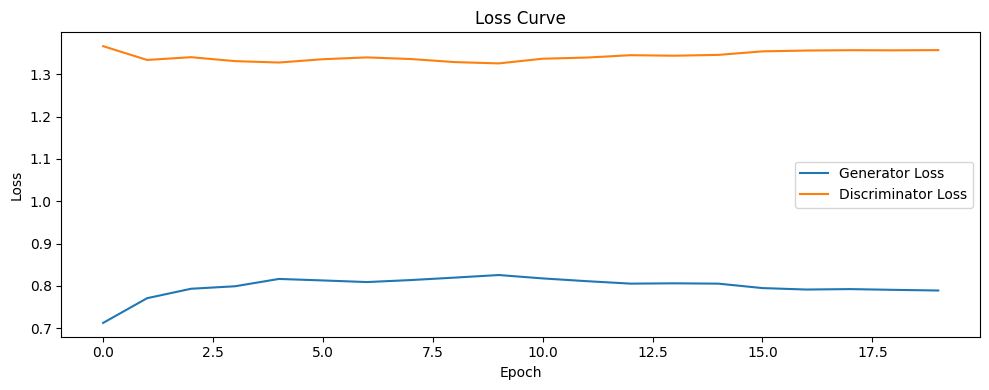

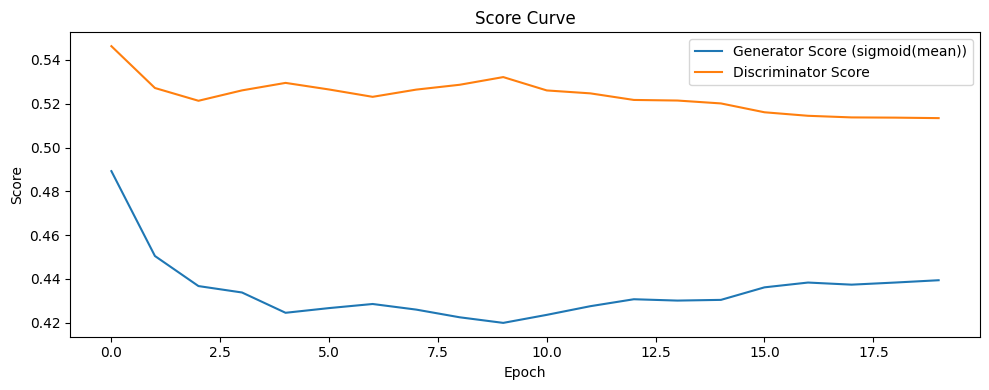

In [ ]:
# ====== GAN on MNISTÔºöÁ©©ÂÆö Plus ÁâàÔºàÂèØÁõ¥Êé•Âü∑Ë°åÔºâ ======
# !pip install -q torch torchvision matplotlib

import os, random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from torch.nn.utils import spectral_norm

# ---------- Ë∂ÖÂèÉÊï∏ ----------
seed = 42
z_dim = 100
batch_size = 64
epochs = 20
g_lr = 2e-4
d_lr = 5e-5                 # TTURÔºöÊîæÊÖ¢ D
betas = (0.5, 0.999)
real_label_smooth = 0.9
label_flip_p = 0.05         # 5% Â∞èÊØî‰æãÊ®ôÁ±§ÁøªËΩâ
r1_gamma = 5.0              # R1 Ê¢ØÂ∫¶Ê≠£ÂâáÂº∑Â∫¶
save_dir = "./gan_mnist_out_plus"
os.makedirs(save_dir, exist_ok=True)

# ---------- Âõ∫ÂÆö seed / Ë£ùÁΩÆ ----------
random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Ë≥áÊñô ----------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))   # [-1,1]ÔºåÈÖçÂêà Tanh
])
train_set = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)

# ---------- Ê®°Âûã ----------
class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 784),
            nn.Tanh()
        )
    def forward(self, z):
        x = self.model(z)
        return x.view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        # ‰∏çÂä† SigmoidÔºåÈÖç BCEWithLogitsLoss
        self.model = nn.Sequential(
            nn.Flatten(),
            spectral_norm(nn.Linear(784, 256)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.1),
            spectral_norm(nn.Linear(256, 1))  # logits
        )
    def forward(self, x):
        return self.model(x)

def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0.0, 0.02)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

G = Generator(z_dim).to(device).apply(weights_init)
D = Discriminator().to(device).apply(weights_init)

criterion = nn.BCEWithLogitsLoss()
g_opt = optim.Adam(G.parameters(), lr=g_lr, betas=betas)
d_opt = optim.Adam(D.parameters(), lr=d_lr, betas=betas)

# ---------- ËøΩËπ§ ----------
g_losses, d_losses, g_scores, d_scores = [], [], [], []
fixed_z = torch.randn(64, z_dim, device=device)

# Instance NoiseÔºöÁî± 0.15 Á∑©ÈôçÂà∞ 0.02ÔºàÊõ¥ÊÖ¢ÈÄÄÁÅ´Ôºâ
sigma_start, sigma_end = 0.15, 0.02
def sigma_at(epoch_idx, total_epochs):
    return sigma_start + (sigma_end - sigma_start) * (epoch_idx - 1) / (total_epochs - 1)
def add_instance_noise(x, sigma):
    return x + torch.randn_like(x) * sigma if sigma > 0 else x

# ---------- Ë®ìÁ∑¥ ----------
for epoch in range(1, epochs + 1):
    G.train(); D.train()
    sig = sigma_at(epoch, epochs)

    epoch_g_loss = epoch_d_loss = 0.0
    epoch_g_score = epoch_d_score = 0.0
    n_batches = 0

    for real_imgs, _ in train_loader:
        real_imgs = real_imgs.to(device)
        bsz = real_imgs.size(0)

        # label smoothing + Â∞ëÈáèÁøªËΩâ
        real_targets = torch.full((bsz, 1), real_label_smooth, device=device)
        fake_targets = torch.zeros(bsz, 1, device=device)
        if label_flip_p > 0:
            real_flip = torch.rand_like(real_targets) < label_flip_p
            fake_flip = torch.rand_like(fake_targets) < label_flip_p
            real_targets = torch.where(real_flip, torch.zeros_like(real_targets), real_targets)
            fake_targets = torch.where(fake_flip, torch.ones_like(fake_targets), fake_targets)

        # ---- Train DÔºàÂê´ R1 Ê≠£ÂâáÂú®ÁúüÊ®£Êú¨Ôºâ----
        D.zero_grad(set_to_none=True)
        with torch.no_grad():
            z = torch.randn(bsz, z_dim, device=device)
            fake_imgs = G(z)

        # R1: ÈúÄË¶ÅÂ∞ç real_imgs Ê±ÇÊ¢ØÂ∫¶
        real_imgs.requires_grad_(True)
        d_real_logits = D(add_instance_noise(real_imgs, sig))
        d_fake_logits = D(add_instance_noise(fake_imgs, sig))

        d_loss_basic = criterion(d_real_logits, real_targets) + criterion(d_fake_logits, fake_targets)

        # R1 Ê¢ØÂ∫¶Êá≤ÁΩ∞ÔºàÂ∞çÁúüÊ®£Êú¨Ôºâ
        r1_grads = torch.autograd.grad(
            outputs=d_real_logits.sum(), inputs=real_imgs,
            create_graph=True, retain_graph=True, only_inputs=True
        )[0]
        r1_penalty = 0.5 * r1_gamma * (r1_grads.view(bsz, -1).pow(2).sum(dim=1)).mean()

        d_loss = d_loss_basic + r1_penalty
        d_loss.backward()
        d_opt.step()
        real_imgs = real_imgs.detach()  # Ê∏ÖÊéâÈúÄË¶ÅÊ¢ØÂ∫¶

        # ‰º∞ÁÆó D Áï∂ÂâçÂº∑Â∫¶
        with torch.no_grad():
            d_real_p = torch.sigmoid(d_real_logits).mean().item()
            d_fake_p = torch.sigmoid(d_fake_logits).mean().item()
            d_score_batch = (d_real_p + (1.0 - d_fake_p)) / 2.0

        # ---- Train GÔºàËá™ÈÅ©ÊáâÂ§öÊ≠•ÔºöD Â§™Âº∑Â∞±Â§öË®ì 2~3 Ê¨°Ôºâ----
        g_steps = 1 + int(d_score_batch > 0.60) + int(d_score_batch > 0.65)  # 1~3 Ê≠•
        last_g_logits = None
        for _ in range(g_steps):
            G.zero_grad(set_to_none=True)
            z = torch.randn(bsz, z_dim, device=device)
            gen_imgs = G(z)
            last_g_logits = D(add_instance_noise(gen_imgs, sig))
            g_loss = criterion(last_g_logits, real_targets)  # ÊÉ≥Ë¢´Âà§ÊàêÁúü
            g_loss.backward()
            g_opt.step()

        # --- Á¥ÄÈåÑ ---
        with torch.no_grad():
            g_prob = torch.sigmoid(last_g_logits).mean().item()
        epoch_g_loss += g_loss.item()
        epoch_d_loss += d_loss.item()
        epoch_g_score += g_prob
        epoch_d_score += d_score_batch
        n_batches += 1

    # Âπ≥ÂùáÂåñ
    g_losses.append(epoch_g_loss / n_batches)
    d_losses.append(epoch_d_loss / n_batches)
    g_scores.append(epoch_g_score / n_batches)
    d_scores.append(epoch_d_score / n_batches)

    # Âõ∫ÂÆöÂô™ËÅ≤Ê®£Êú¨
    with torch.no_grad():
        samples = G(fixed_z).cpu()
        samples = (samples + 1) / 2
        save_image(samples, os.path.join(save_dir, f"samples_epoch_{epoch:03d}.png"), nrow=8)

    print(f"[Epoch {epoch:02d}/{epochs}] "
          f"G_loss: {g_losses[-1]:.4f} | D_loss: {d_losses[-1]:.4f} | "
          f"G_score‚âà{g_scores[-1]:.3f} | D_score‚âà{d_scores[-1]:.3f} | "
          f"sigma={sig:.3f}")

print(f"‚úÖ ÂΩ±ÂÉèÊ®£Êú¨ËàáËº∏Âá∫Â∑≤Â≠òÂà∞Ôºö{save_dir}")

# ---------- Ë¶ñË¶∫Âåñ ----------
plt.figure(figsize=(10,4))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(g_scores, label="Generator Score (sigmoid(mean))")
plt.plot(d_scores, label="Discriminator Score")
plt.title("Score Curve")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


Device: cuda
[Epoch 01/25] G_loss: -0.3326 | D_loss: 1.5658 | G_score‚âà0.581 | D_score‚âà0.554
[Epoch 02/25] G_loss: -0.1658 | D_loss: 1.7462 | G_score‚âà0.540 | D_score‚âà0.530
[Epoch 03/25] G_loss: 0.0091 | D_loss: 1.7656 | G_score‚âà0.498 | D_score‚âà0.528
[Epoch 04/25] G_loss: -0.0586 | D_loss: 1.8246 | G_score‚âà0.514 | D_score‚âà0.521
[Epoch 05/25] G_loss: -0.0425 | D_loss: 1.8512 | G_score‚âà0.511 | D_score‚âà0.518
[Epoch 06/25] G_loss: -0.0402 | D_loss: 1.8698 | G_score‚âà0.510 | D_score‚âà0.516
[Epoch 07/25] G_loss: -0.0251 | D_loss: 1.8762 | G_score‚âà0.506 | D_score‚âà0.515
[Epoch 08/25] G_loss: -0.0313 | D_loss: 1.8789 | G_score‚âà0.508 | D_score‚âà0.515
[Epoch 09/25] G_loss: -0.0412 | D_loss: 1.8768 | G_score‚âà0.510 | D_score‚âà0.515
[Epoch 10/25] G_loss: -0.0086 | D_loss: 1.8761 | G_score‚âà0.503 | D_score‚âà0.515
[Epoch 11/25] G_loss: -0.0206 | D_loss: 1.8789 | G_score‚âà0.505 | D_score‚âà0.515
[Epoch 12/25] G_loss: -0.0141 | D_loss: 1.8783 | G_score‚âà0.504 | D_score‚

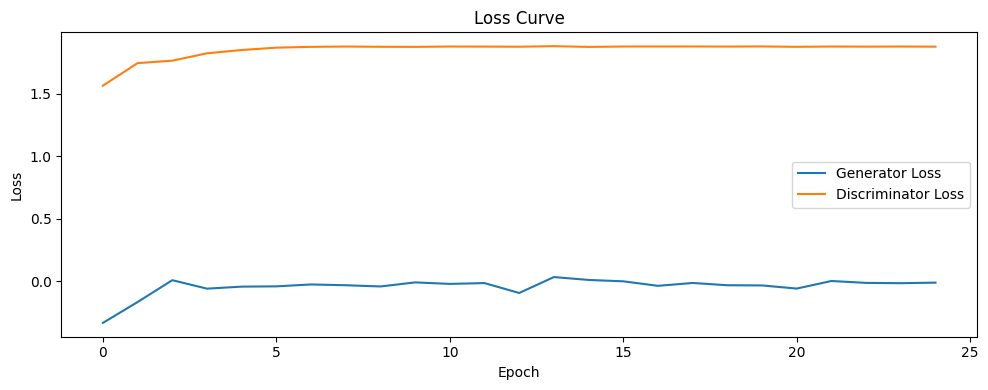

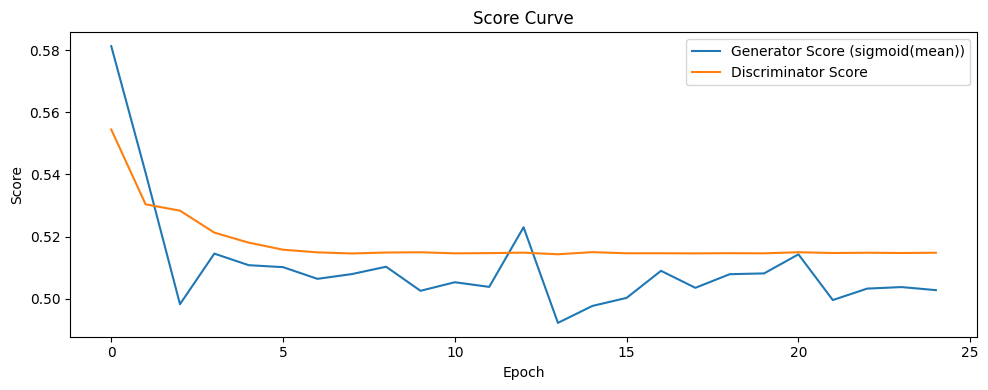

In [ ]:
# ===== DCGAN (Conv) on MNIST with Hinge Loss ‚Äî ÂèØÁõ¥Êé•Âü∑Ë°å =====
# Ëã•Âú® Colab Á¨¨‰∏ÄÊ¨°‰ΩøÁî®ÔºåÂèñÊ∂à‰∏ã‰∏ÄË°åË®ªËß£ÂÆâË£ùÂ•ó‰ª∂
# !pip install -q torch torchvision matplotlib

import os, random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import matplotlib.pyplot as plt
from torch.nn.utils import spectral_norm

# ---------- Ë∂ÖÂèÉÊï∏ ----------
seed = 42
z_dim = 100
batch_size = 128
epochs = 25
g_lr = 2e-4
d_lr = 1e-4                 # TTURÔºöD ÊÖ¢‰∏ÄÈªû
betas = (0.5, 0.999)
save_dir = "./dcgan_mnist_hinge_out"
os.makedirs(save_dir, exist_ok=True)

# ---------- Âõ∫ÂÆö seed / Ë£ùÁΩÆ ----------
random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Ë≥áÊñô ----------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))   # Êò†Â∞ÑÂà∞ [-1,1]ÔºåÈÖçÂêà Tanh
])
train_set = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)

# ---------- Ê®°Âûã ----------
class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(z_dim, 128 * 7 * 7),
            nn.BatchNorm1d(128 * 7 * 7),
            nn.ReLU(True),
        )
        self.deconv = nn.Sequential(
            # 7x7x128 -> 14x14x64
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # 14x14x64 -> 28x28x1
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 128, 7, 7)
        x = self.deconv(x)
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        # ‰∏çÂä† SigmoidÔºõHinge Loss ‰ΩøÁî®„Äålogits„Äç
        self.main = nn.Sequential(
            spectral_norm(nn.Conv2d(1, 64, 4, 2, 1, bias=False)),   # 28->14
            nn.LeakyReLU(0.2, inplace=True),

            spectral_norm(nn.Conv2d(64, 128, 4, 2, 1, bias=False)), # 14->7
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            spectral_norm(nn.Linear(128 * 7 * 7, 1))
        )

    def forward(self, x):
        return self.main(x)

def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.Linear)):
        nn.init.normal_(m.weight, 0.0, 0.02)
        if getattr(m, "bias", None) is not None:
            nn.init.zeros_(m.bias)
    if isinstance(m, (nn.BatchNorm1d, nn.BatchNorm2d)):
        nn.init.normal_(m.weight, 1.0, 0.02)
        nn.init.zeros_(m.bias)

G = Generator(z_dim).to(device).apply(weights_init)
D = Discriminator().to(device).apply(weights_init)

g_opt = optim.Adam(G.parameters(), lr=g_lr, betas=betas)
d_opt = optim.Adam(D.parameters(), lr=d_lr, betas=betas)

# ---------- ËøΩËπ§ ----------
g_losses, d_losses, g_scores, d_scores = [], [], [], []
fixed_z = torch.randn(64, z_dim, device=device)

# ---------- Hinge ÊêçÂ§± ----------
# D:  max(0, 1 - D(real)) + max(0, 1 + D(fake))
# G:  - D(fake)
relu = nn.ReLU()

# ---------- Ë®ìÁ∑¥ ----------
for epoch in range(1, epochs + 1):
    G.train(); D.train()
    ep_g, ep_d, ep_gs, ep_ds, n = 0.0, 0.0, 0.0, 0.0, 0

    for real, _ in train_loader:
        real = real.to(device)
        bsz = real.size(0)

        # ---- Train D ----
        D.zero_grad(set_to_none=True)
        z = torch.randn(bsz, z_dim, device=device)
        with torch.no_grad():
            fake = G(z)

        d_real = D(real)
        d_fake = D(fake)
        d_loss = relu(1.0 - d_real).mean() + relu(1.0 + d_fake).mean()
        d_loss.backward()
        d_opt.step()

        # ---- Train G ----
        G.zero_grad(set_to_none=True)
        z = torch.randn(bsz, z_dim, device=device)
        fake = G(z)
        g_loss = -D(fake).mean()
        g_loss.backward()
        g_opt.step()

        # ---- ÊåáÊ®ôÔºàÁî® sigmoid ËΩâÊàê„ÄåÂÅΩÊ©üÁéá„Äç‰æøÊñºËßÄÂØüÔºâ----
        with torch.no_grad():
            d_real_p = torch.sigmoid(d_real).mean().item()
            d_fake_p = torch.sigmoid(d_fake).mean().item()
            d_score = (d_real_p + (1.0 - d_fake_p)) / 2.0
            g_prob = torch.sigmoid(D(fake)).mean().item()

        ep_g += g_loss.item(); ep_d += d_loss.item()
        ep_gs += g_prob; ep_ds += d_score; n += 1

    g_losses.append(ep_g / n); d_losses.append(ep_d / n)
    g_scores.append(ep_gs / n); d_scores.append(ep_ds / n)

    # Âõ∫ÂÆöÂô™ËÅ≤Ê®£Êú¨
    with torch.no_grad():
        samples = G(fixed_z).cpu()
        samples = (samples + 1) / 2
        save_image(samples, os.path.join(save_dir, f"samples_epoch_{epoch:03d}.png"), nrow=8)

    print(f"[Epoch {epoch:02d}/{epochs}] "
          f"G_loss: {g_losses[-1]:.4f} | D_loss: {d_losses[-1]:.4f} | "
          f"G_score‚âà{g_scores[-1]:.3f} | D_score‚âà{d_scores[-1]:.3f}")

print(f"‚úÖ ÂΩ±ÂÉèÊ®£Êú¨ËàáËº∏Âá∫Â∑≤Â≠òÂà∞Ôºö{save_dir}")

# ---------- Ë¶ñË¶∫Âåñ ----------
plt.figure(figsize=(10,4))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,4))
plt.plot(g_scores, label="Generator Score (sigmoid(mean))")
plt.plot(d_scores, label="Discriminator Score")
plt.title("Score Curve")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.tight_layout(); plt.show()


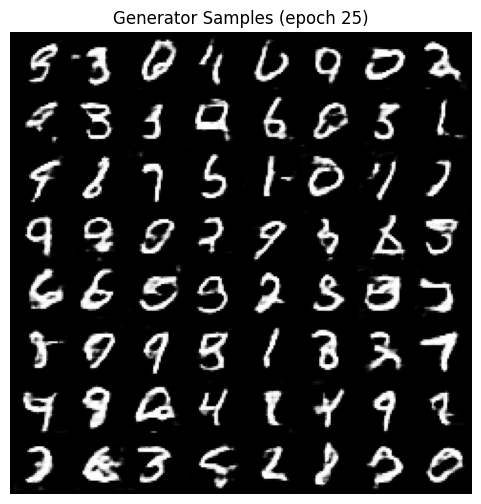

[Epoch 25/25] G_loss: 0.0177 | D_loss: 1.8820 | G_score‚âà0.496 | D_score‚âà0.514
‚úÖ ÂΩ±ÂÉèÊ®£Êú¨ËàáËº∏Âá∫Â∑≤Â≠òÂà∞Ôºö./dcgan_mnist_hinge_out
üéû Â∑≤Ëº∏Âá∫ GIFÔºö ./dcgan_mnist_hinge_out/training_evolution.gif


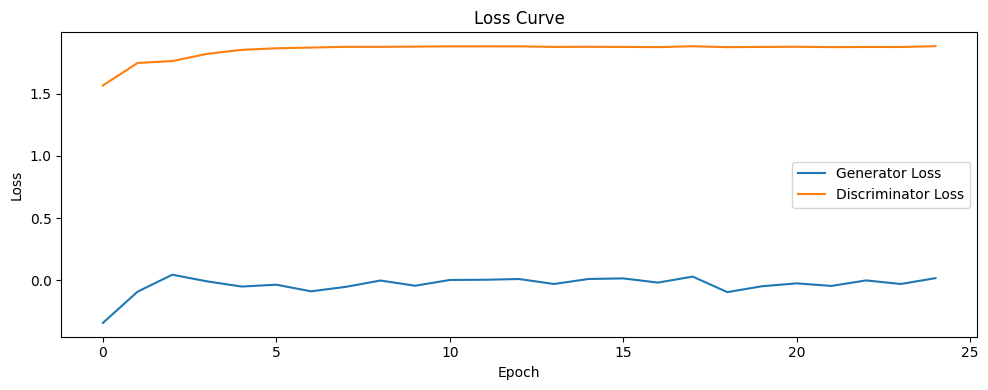

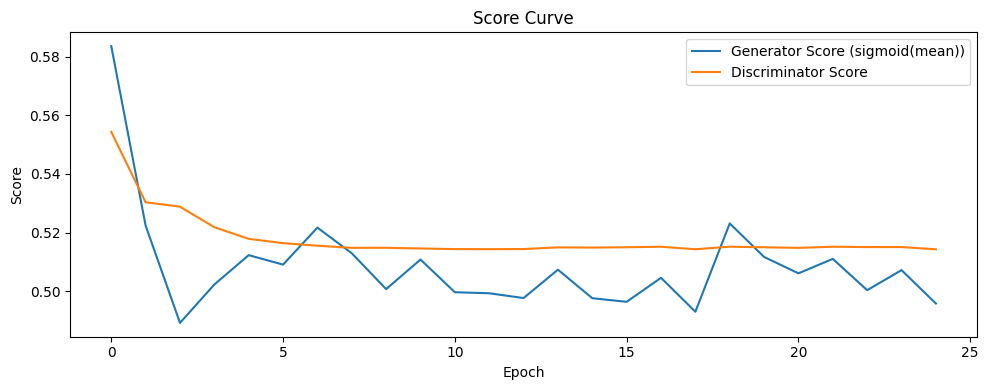

In [ ]:
# ===== DCGAN (Conv) on MNIST with Hinge Loss ‚Äî Âç≥ÊôÇÈ°ØÁ§∫Áâà =====
# !pip install -q torch torchvision matplotlib imageio

import os, random, glob, re
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
from torch.nn.utils import spectral_norm
from IPython.display import clear_output, display
import imageio.v2 as imageio

# ---------- È°ØÁ§∫/Ëº∏Âá∫Ë®≠ÂÆö ----------
LIVE_PREVIEW = True      # ÊØèÂÄã epoch Âç≥ÊôÇÈ°ØÁ§∫ÁîüÊàêÂúñ
MAKE_GIF     = True      # Ë®ìÁ∑¥ÁµêÊùüÊää samples ‰∏≤Êàê GIF
GIF_FPS      = 4

# ---------- Ë∂ÖÂèÉÊï∏ ----------
seed = 42
z_dim = 100
batch_size = 128
epochs = 25
g_lr = 2e-4
d_lr = 1e-4                 # TTURÔºöD ÊÖ¢‰∏ÄÈªû
betas = (0.5, 0.999)
save_dir = "./dcgan_mnist_hinge_out"
os.makedirs(save_dir, exist_ok=True)

# ---------- Âõ∫ÂÆö seed / Ë£ùÁΩÆ ----------
random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---------- Ë≥áÊñô ----------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))   # Êò†Â∞ÑÂà∞ [-1,1]ÔºåÈÖçÂêà Tanh
])
train_set = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True)

# ---------- Ê®°Âûã ----------
class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(z_dim, 128 * 7 * 7),
            nn.BatchNorm1d(128 * 7 * 7),
            nn.ReLU(True),
        )
        self.deconv = nn.Sequential(
            # 7x7x128 -> 14x14x64
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            # 14x14x64 -> 28x28x1
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 128, 7, 7)
        x = self.deconv(x)
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        # ‰∏çÂä† SigmoidÔºõHinge Loss ‰ΩøÁî® logits
        self.main = nn.Sequential(
            spectral_norm(nn.Conv2d(1, 64, 4, 2, 1, bias=False)),   # 28->14
            nn.LeakyReLU(0.2, inplace=True),

            spectral_norm(nn.Conv2d(64, 128, 4, 2, 1, bias=False)), # 14->7
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            spectral_norm(nn.Linear(128 * 7 * 7, 1))
        )

    def forward(self, x):
        return self.main(x)

def weights_init(m):
    if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.Linear)):
        nn.init.normal_((m.weight), 0.0, 0.02)
        if getattr(m, "bias", None) is not None:
            nn.init.zeros_(m.bias)
    if isinstance(m, (nn.BatchNorm1d, nn.BatchNorm2d)):
        nn.init.normal_(m.weight, 1.0, 0.02)
        nn.init.zeros_(m.bias)

G = Generator(z_dim).to(device).apply(weights_init)
D = Discriminator().to(device).apply(weights_init)

g_opt = optim.Adam(G.parameters(), lr=g_lr, betas=betas)
d_opt = optim.Adam(D.parameters(), lr=d_lr, betas=betas)

# ---------- ËøΩËπ§ ----------
g_losses, d_losses, g_scores, d_scores = [], [], [], []
fixed_z = torch.randn(64, z_dim, device=device)

# ---------- Hinge ÊêçÂ§± ----------
relu = nn.ReLU()

def preview(samples, title):
    """Êää 64 Âºµ 28x28 ÂúñÊãºÊàê‰∏ÄÂºµ‰∏¶Âç≥ÊôÇÈ°ØÁ§∫"""
    grid = make_grid(samples, nrow=8, normalize=True, value_range=(-1, 1))
    npimg = grid.permute(1, 2, 0).cpu().numpy()
    clear_output(wait=True)
    plt.figure(figsize=(6,6))
    plt.imshow(npimg.squeeze(), cmap='gray')
    plt.axis("off")
    plt.title(title)
    display(plt.gcf())
    plt.close()

# ---------- Ë®ìÁ∑¥ ----------
for epoch in range(1, epochs + 1):
    G.train(); D.train()
    ep_g, ep_d, ep_gs, ep_ds, n = 0.0, 0.0, 0.0, 0.0, 0

    for real, _ in train_loader:
        real = real.to(device)
        bsz = real.size(0)

        # ---- Train D ----
        D.zero_grad(set_to_none=True)
        z = torch.randn(bsz, z_dim, device=device)
        with torch.no_grad():
            fake = G(z)

        d_real = D(real)
        d_fake = D(fake)
        d_loss = relu(1.0 - d_real).mean() + relu(1.0 + d_fake).mean()
        d_loss.backward()
        d_opt.step()

        # ---- Train G ----
        G.zero_grad(set_to_none=True)
        z = torch.randn(bsz, z_dim, device=device)
        fake = G(z)
        g_loss = -D(fake).mean()
        g_loss.backward()
        g_opt.step()

        # ---- ÊåáÊ®ôÔºàÁî® sigmoid ËΩâ„ÄåÂÅΩÊ©üÁéá„ÄçËßÄÂØüÔºâ----
        with torch.no_grad():
            d_real_p = torch.sigmoid(d_real).mean().item()
            d_fake_p = torch.sigmoid(d_fake).mean().item()
            d_score = (d_real_p + (1.0 - d_fake_p)) / 2.0
            g_prob = torch.sigmoid(D(fake)).mean().item()

        ep_g += g_loss.item(); ep_d += d_loss.item()
        ep_gs += g_prob; ep_ds += d_score; n += 1

    g_losses.append(ep_g / n); d_losses.append(ep_d / n)
    g_scores.append(ep_gs / n); d_scores.append(ep_ds / n)

    # Âõ∫ÂÆöÂô™ËÅ≤Ê®£Êú¨ + ÂÑ≤Â≠ò +ÔºàÂèØÈÅ∏ÔºâÂç≥ÊôÇÈ†êË¶Ω
    with torch.no_grad():
        samples = G(fixed_z).cpu()
        save_path = os.path.join(save_dir, f"samples_epoch_{epoch:03d}.png")
        # [-1,1] -> [0,1] Â≠òÊ™î
        save_image((samples + 1) / 2, save_path, nrow=8)
        if LIVE_PREVIEW:
            preview(samples, f"Generator Samples (epoch {epoch})")

    print(f"[Epoch {epoch:02d}/{epochs}] "
          f"G_loss: {g_losses[-1]:.4f} | D_loss: {d_losses[-1]:.4f} | "
          f"G_score‚âà{g_scores[-1]:.3f} | D_score‚âà{d_scores[-1]:.3f}")

print(f"‚úÖ ÂΩ±ÂÉèÊ®£Êú¨ËàáËº∏Âá∫Â∑≤Â≠òÂà∞Ôºö{save_dir}")

# ----------ÔºàÂèØÈÅ∏ÔºâÊääÊâÄÊúâ epoch ÁöÑ samples ‰∏≤Êàê GIF ----------
if MAKE_GIF:
    frames = []
    files = sorted(glob.glob(os.path.join(save_dir, "samples_epoch_*.png")),
                   key=lambda f: int(re.search(r"(\d+)", os.path.basename(f)).group(1)))
    for f in files:
        frames.append(imageio.imread(f))
    gif_path = os.path.join(save_dir, "training_evolution.gif")
    if frames:
        imageio.mimsave(gif_path, frames, fps=GIF_FPS)
        print("üéû Â∑≤Ëº∏Âá∫ GIFÔºö", gif_path)

# ---------- Ë¶ñË¶∫Âåñ Loss/Score Êõ≤Á∑ö ----------
plt.figure(figsize=(10,4))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,4))
plt.plot(g_scores, label="Generator Score (sigmoid(mean))")
plt.plot(d_scores, label="Discriminator Score")
plt.title("Score Curve")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.tight_layout(); plt.show()

# ---------- È°çÂ§ñÔºöÂç≥ÊôÇÊäΩÊ®£ÂáΩÂºèÔºàÈúÄË¶ÅÊôÇÂëºÂè´Ôºâ ----------
def show_from_G(G, z_dim=100, n=64, nrow=8, title="Generator samples (live)"):
    G.eval()
    with torch.no_grad():
        z = torch.randn(n, z_dim, device=next(G.parameters()).device)
        fake = G(z).detach().cpu()
        grid = make_grid(fake, nrow=nrow, normalize=True, value_range=(-1, 1))
    plt.figure(figsize=(6,6))
    plt.imshow(grid.permute(1,2,0).squeeze(), cmap="gray")
    plt.axis("off"); plt.title(title); plt.show()

# Áî®Ê≥ïÔºö
# show_from_G(G, z_dim=100)  # ‰ªªÊÑèÊôÇÂàªÂç≥ÊôÇÈ°ØÁ§∫ÁîüÊàêÂô®ÁöÑÂúñ
